<div style="border:solid green 2px; padding: 20px">
<b>Hello, Gaini!</b>

Grigoriy is here, I've reviewed some of your previous projects. I hope, you didn't tired of me :)

As usual, you can find my comments in <font color='green'>green</font>, <font color='blue'>blue</font> or <font color='orange'>orange</font> boxes like this:

<div class="alert alert-success">
<b>Reviewer's comment:</b> if everything is done succesfully
</div>

<div class="alert alert-warning">
<b>Reviewer's comment: </b> if I can give some recommendations
</div>

<div class="alert alert-danger">
<b>Reviewer's comment:</b> if the block requires some corrections. Work can't be accepted with the red comments.
</div>

    
Let's work on the project in dialogue: if you change something in the project or respond to my comments, write about it. It will be easier for me to track the changes if you highlight your comments:
    
<div class="alert alert-info"> <b>Student's comment:</b> For example like this.</div>

### <font color='orange'>General feedback</font>
Thank you for sending your project.  It's clear that a lot of work has been put into it. I liked your plots and coding style, but please, pay attention to the conclusions quantity and quality.

**Update**:<br>
Thank you for the update, good job! Your project has been accepted.

<div class="alert alert-warning">
<b>Reviewer's comment: </b> Additional links:
    <ul>
        <li>SHAP model explainer: <a>https://github.com/slundberg/shap</a></li>
        <li>Linear regression from scratch: <a>https://medium.com/analytics-vidhya/implementing-linear-regression-using-sklearn-76264a3c073c</a></li>
        <li>Pandas profilier: <a>https://github.com/pandas-profiling/pandas-profiling</a></li>
    </ul>
</div>

## Forecasts and Predictions Project

#### Goal: Suggest measures to cut churn in a gym and identify an ideal customer portrait.
#### Plan:

<ol>
  <li>Open and preprocess the file.</li>
  <li>Study the data.</li>
    <ol>
        <li>Find mean and std of all features.</li>
        <li>Find mean and std of all features grouped by churn value.</li>
        <li>PLot feature distribution and correlation.</li>
    </ol>
  <li>Build a Binary classification model (Logistic Regression and Random Forest).</li>
    <ol>
        <li>Divide the data.</li>
        <li>Find precision/accuracy/recall.</li>
    </ol>    
  <li>Create user clusters with K-means clusterization.</li>
    <ol>
        <li>Plot a dendrogram.</li>
        <li>Train and test the clustering model.</li>
        <li>PLot feature distribution by clusters.</li>
    </ol>
</ol>

<div class="alert alert-warning">
<b>Reviewer's comment: </b> Nice introduction! You can improve it with an interactive table of content:<br><a>https://moonbooks.org/Articles/How-to-create-a-table-of-contents-in-a-jupyter-notebook-/</a>
</div>

### Step 1. Download the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
gym_data = pd.read_csv('/datasets/gym_churn_us.csv')

In [4]:
gym_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


In [5]:
gym_data.columns

Index(['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone',
       'Contract_period', 'Group_visits', 'Age',
       'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime',
       'Avg_class_frequency_total', 'Avg_class_frequency_current_month',
       'Churn'],
      dtype='object')

In [6]:
category = ['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone',
        'Group_visits', 'Churn']
for category in category:
    gym_data[category] = pd.to_numeric(gym_data[category], downcast='integer')

In [7]:
gym_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int8
Near_Location                        4000 non-null int8
Partner                              4000 non-null int8
Promo_friends                        4000 non-null int8
Phone                                4000 non-null int8
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int8
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int8
dtypes: float64(4), int64(3), int8(7)
memory usage: 246.2 KB


The data has no missing values. The data types of categorical columns was downcasted. 

<div class="alert alert-warning">
<s><b>Reviewer's comment: </b> But I can't see step 1 :)
</div>

<div class="alert alert-warning">
<b>Reviewer's comment: </b> Please note that 64 bits is an excessive amount of space for storing your features. Many of them are binary and can be coded as categorical or boolean. Here you can read more about data type optimization: <br><a>https://medium.com/@vincentteyssier/optimizing-the-size-of-a-pandas-dataframe-for-low-memory-environment-5f07db3d72e</a>
</div>

<div class="alert alert-info"> <b></b> I cannot change columns to category type because then I cannot calculate the means for these features. So I just downcasted them. In general thanks for the recommendations I found them very useful for my further studies :).</div>

<div class="alert alert-success">
<b>Reviewer's comment v2: </b> You are always welcome :)
</div>

### Step 2. Carrying out exploratory data analysis (EDA)

In [8]:
gym_data.drop_duplicates(inplace=True)
gym_data.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [9]:
gym_data.groupby('Churn').mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


<div class="alert alert-danger">
<s><b>Reviewer's comment:</b> Please, add some conclusions here.
</div>

The table above gives information about the means of the feature values divided in 2 groups (churn==1 or churn==0). One can see that they have almost identcal gender distribution. The clients from both groups seem to choose the gym because it is located nearby. 90% of all people left their phones. The rest of the features are clearly different, the churn group==0 has much greater mean values for additional charges, contract period, months till the end, lifetime, average class frequency. These are the features that can be attributed to a loyal client. 

In [10]:
gym_data_col_rename = ['Gender', 'Client lives near gym (yes/no)', 'Has a partner (yes/no)', 'Used Promo friends offer (yes/no)', 'Left Phone number (yes/no)',
       'Contract period length in months', 'Has group visits', 'Age',
       'Total lifetime additional charges', 'Month till the end of contract', 'Lifetime',
       'Total average class frequenct', 'Average class frequency for last month',
       'Churn']

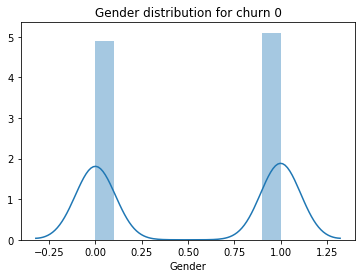

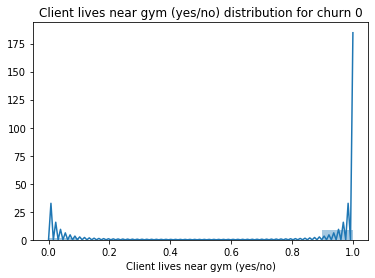

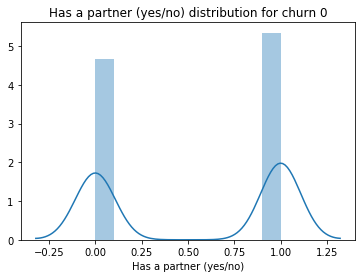

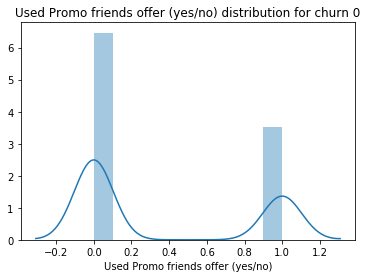

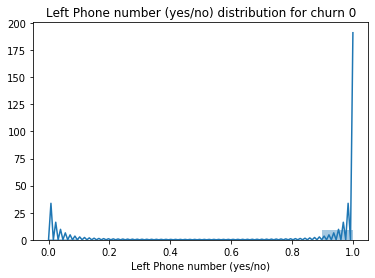

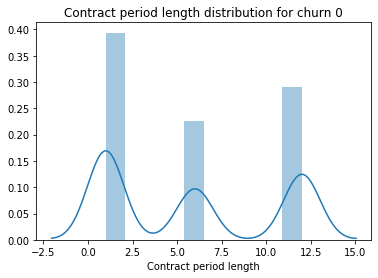

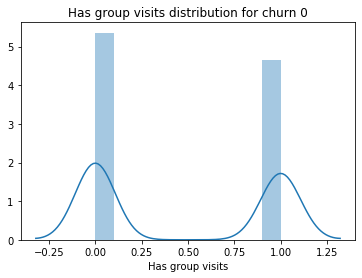

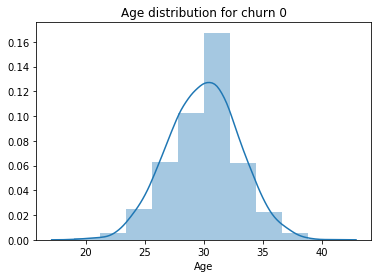

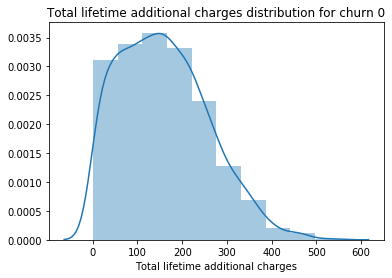

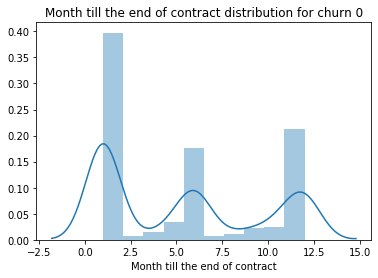

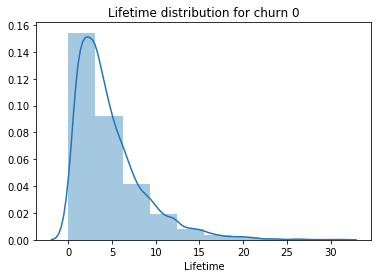

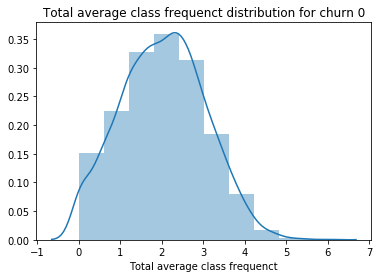

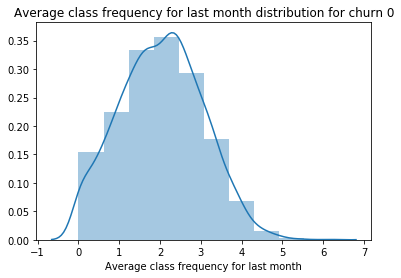

/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


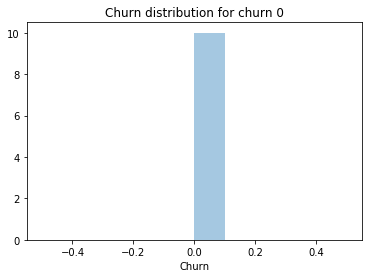

In [12]:
#Churn == 0
for i in range(len(gym_data.columns)):
    sns.distplot(gym_data.query('Churn==0')[gym_data.columns[i]], bins = 10)
    plt.title(gym_data_col_rename[i] + ' ' + 'distribution for churn 0')
    plt.xlabel(gym_data_col_rename[i])
    plt.show() 

<div class="alert alert-warning">
<b>Reviewer's comment: </b> Cool graphs! You can put them not just in one column, but in a nice grid (subplots grid). Here are examples of how to do this automatically using a loop: <a>https://towardsdatascience.com/customizing-multiple-subplots-in-matplotlib-a3e1c2e099bc</a>
</div>

<div class="alert alert-info"> <b>Student's comment:</b> I need to subscribe to read this article((</div>

<div class="alert alert-warning">
<b>Reviewer's comment v2: </b> Oh, it seems that you have exceeded your daily quota. You can delete your cookies in Chrome browser or use  vpn in this case.
</div>

Most of the people from the churn group==0 have 0-5 months lifetime, which that there few people who attend gym for a long period. Clients from this group are in their late 30s in general, spend 2-3 times a week in gym on average, and buy 200$ worth of additional sport products the gym sells.

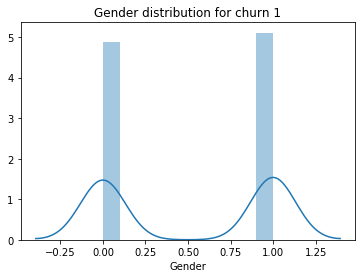

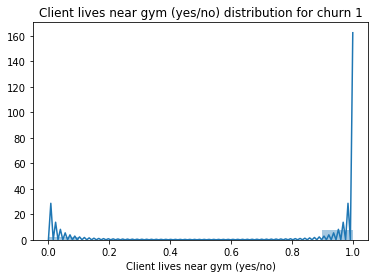

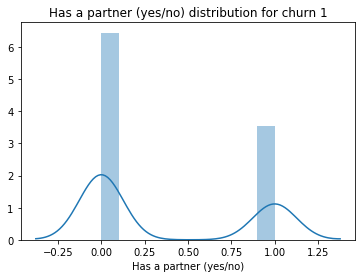

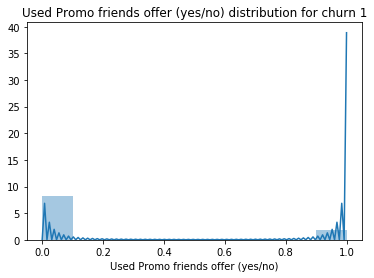

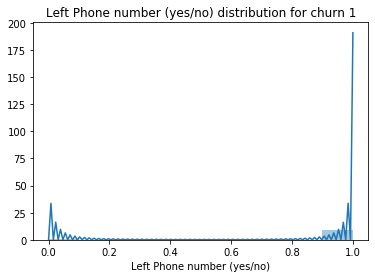

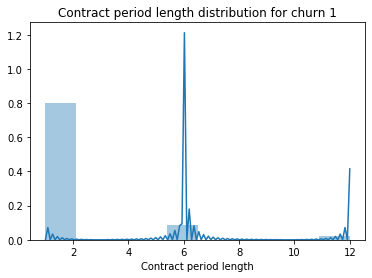

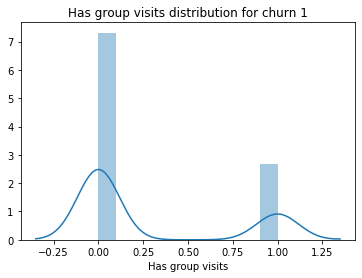

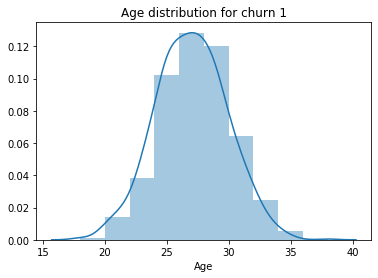

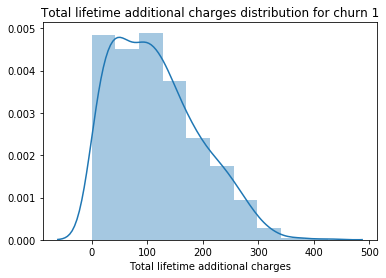

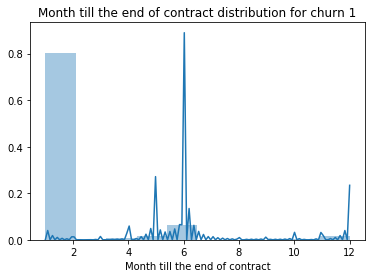

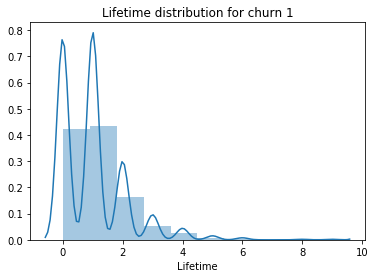

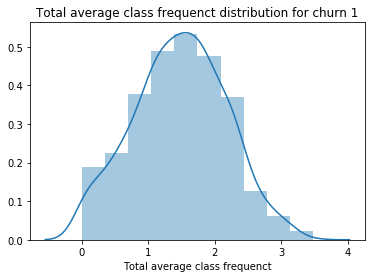

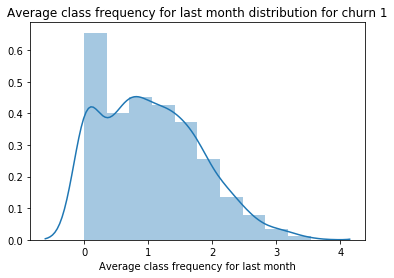

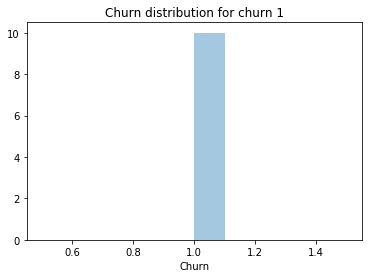

In [13]:
#Churn == 1
for i in range(len(gym_data.columns)):
    sns.distplot(gym_data.query('Churn==1')[gym_data.columns[i]], bins = 10)
    plt.title(gym_data_col_rename[i] + ' ' + 'distribution for churn 1')
    plt.xlabel(gym_data_col_rename[i])
    plt.show()

Churn groups have similarities:Most users leave their phone numbers. People live near the gym and there are almost the same number of men and women. Clients who stay buy more additional stuff, usually have a longer contract period, prefer to attend the gym with partners 2 times a week on average. 60% of clients who stop attending classes are single, whereas only 45% of clients who stay indicated that they are single. 

<div class="alert alert-danger">
<s><b>Reviewer's comment:</b> Please, add titles  and axes captions for every generated chart above.
</div>

<div class="alert alert-danger">
<s><b>Reviewer's comment:</b> Please, add some conclusions.
</div>


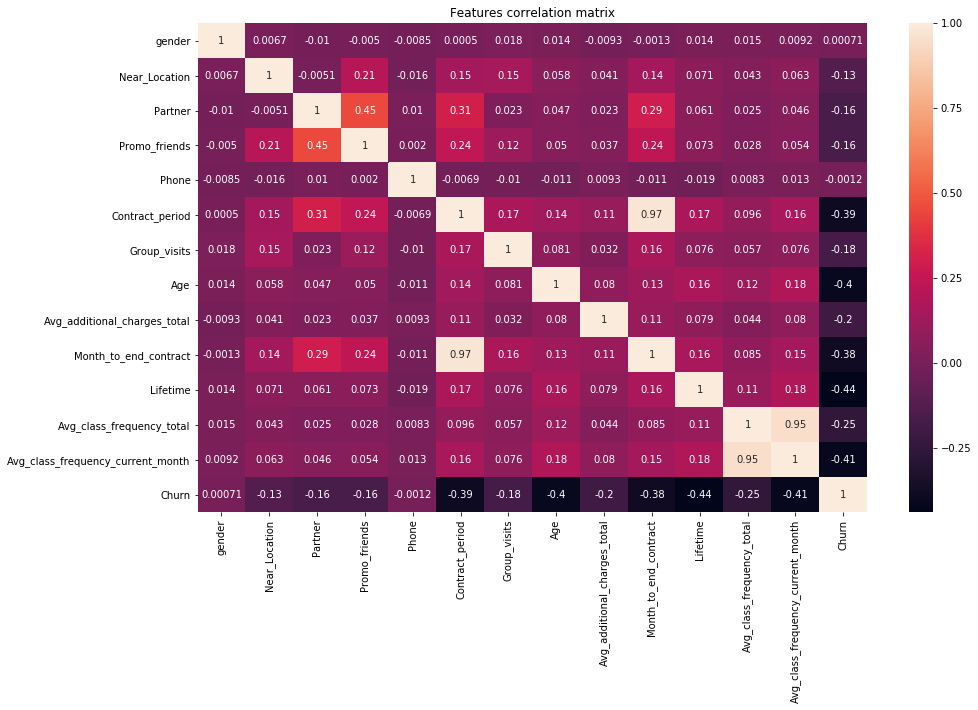

In [14]:
corr_matrix = gym_data.corr()

plt.figure(figsize=(15,9))
sns.heatmap(corr_matrix, annot = True)
plt.title('Features correlation matrix')
plt.show()

<div class="alert alert-danger">
<s><b>Reviewer's comment:</b> Please, add a title to the heatmap.
</div>

The strongest correlation is between Promo_friends and Partner, which probably means that people clients usually sign up their partners through a 'promo friend' offer. Partners usually sign up for the same contract period (Contract_period - Partner correlation). Those who sign up their friends live near the gym. Churn has a negative correlation with age. According to the mean age in both churn groups the younger the client the more chances are he will not continue the gym sessions. Churn rate also depends on the average class frequency, i.e. clients who are consistent with training are more likely to stay. One important insight is that those who continue gym classes sign up for longer contracts because the mean contract_period for churn==0 group is ~5.5 months vs. only ~2 months for churn==1 group.

<div class="alert alert-warning">
<b>Reviewer's comment: </b>  Well done! Please, pay attention that some pairs of features are multicorrelate with each other. Linear models strongly dislike this, because when the matrix is reversed, these numbers begin to tend to infinity.
Check this link:<br>
    <a>https://towardsdatascience.com/multicollinearity-why-is-it-a-problem-398b010b77ac</a>
</div>

<div class="alert alert-danger">
<s><b>Reviewer's comment:</b> Please, add some general EDA conclusions.
</div>

### Conclusion
The clients were grouped by the churn value (0/1). Both groups have shown to have multiple similarities, ie male and female clients attend the gym n almost equal proportions, they usually leave their phone number, and choose the gym because it is close to their homes. Other features differ significantly, average additional charges, contract period, lifetime, average class frequenct- features that identify a loyal customer, are much higher for the churn group==0. There is also a possible explanation why people may stay longer - those who attend classes with a partner or go to group sessions do not stop the trainings. People are social creatures after all.

### Step 3. Build a model to predict user churn

In [15]:
X = gym_data.drop(columns=['Churn']) 
y = gym_data['Churn']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0, stratify=y)

<div class="alert alert-warning">
<b>Reviewer's comment: </b> Let's talk a little bit about data splitting. Since the labels of the target variable are not balanced, it is important to keep them in proportion in the training and test samples. To do this, <b>stratification splitting</b> is used. This keeps the proportionality in the subsamples, and your model will validate more correctly. To do this, just pass inside the function <code>train_test_split</code> parameter <code>stratify=y</code>. You can read more here: <br>.
 <a>https://towardsdatascience.com/the-magic-of-stratification-in-data-analysis-f1ee4800a283</a>  
</div>


<div class="alert alert-warning">
<b>Reviewer's comment: </b> It is also recommended to scale the data for better model convergence. For this you can use StandardScaler: <a>https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html</a> <br>
And here is a comparison of different ways of scaling features and a little theory explanation: <a>https://www.machinelearningmastery.ru/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02/</a>
</div>

In [17]:
scaler = StandardScaler()

X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.fit_transform(X_test)

In [19]:
model = LogisticRegression(random_state=0)
model.fit(X_train_sc, y_train)

y_pred = model.predict(X_test_sc)
probabilities = model.predict_proba(X_test_sc)[:,1]

acc=accuracy_score(y_test, y_pred)
prec=precision_score(y_test, y_pred)
rec=recall_score(y_test, y_pred)
f1=f1_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(acc))
print('Precision: {:.2f}'.format(prec))
print('Recall: {:.2f}'.format(rec))

Accuracy: 0.93
Precision: 0.89
Recall: 0.85


In [21]:
model = RandomForestClassifier(random_state=0)
model.fit(X_train_sc, y_train)

y_pred = model.predict(X_test_sc)

acc=accuracy_score(y_test, y_pred)
prec=precision_score(y_test, y_pred)
rec=recall_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(acc))
print('Precision: {:.2f}'.format(prec))
print('Recall: {:.2f}'.format(rec))

Accuracy: 0.93
Precision: 0.90
Recall: 0.80


The scores show that the Logistic regression model is better for predicting the churn. It has a bigger proportion of true positive predictions. 

<div class="alert alert-success">
<b>Reviewer's comment: </b> That's it !
</div>

### Step 4. Create user clusters

In [22]:
X_sc = scaler.fit_transform(X)

In [23]:
linked = linkage(X_sc, method = 'ward') 

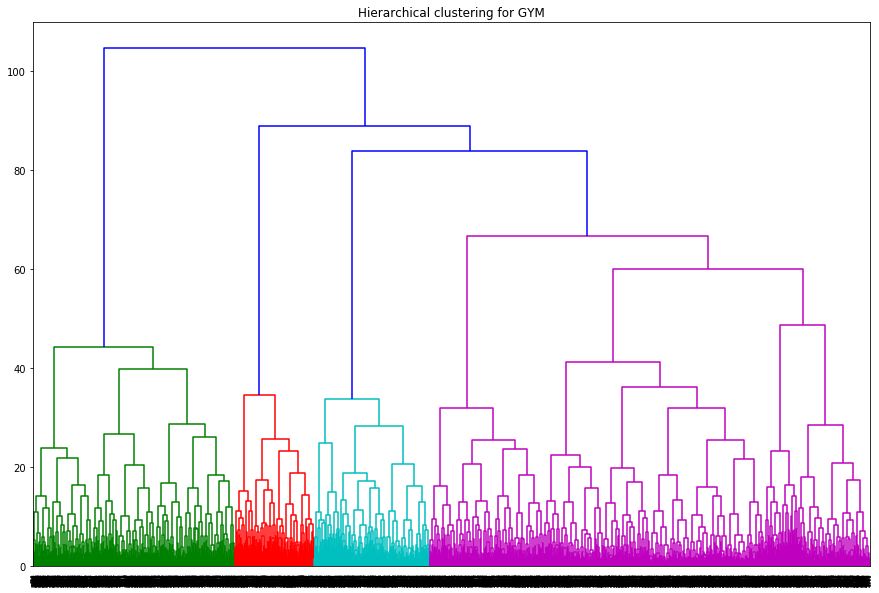

In [24]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchical clustering for GYM')
plt.show() 

The optimal number of clusters - 4

<div class="alert alert-warning">
<b>Reviewer's comment: </b> In general, the choice of the number of clusters is quite tricky, and in the next projects silhouette analysis can help you in solving this issue. As usual - link: <br> <a>https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py</a>
</div>

In [25]:
km = KMeans(n_clusters = 5) 
labels = km.fit_predict(X_sc)

In [26]:
gym_data['cluster']=labels
gym_data.groupby('cluster').mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
cluster,,,,,,,,,,,,,,
0,0.500577,0.936563,0.738178,0.478662,1.0,11.854671,0.546713,29.889273,163.418253,10.798155,4.677047,2.007471,1.999303,0.021915
1,0.485738,0.718011,0.299919,0.018745,1.0,1.914425,0.276284,28.083945,129.496414,1.821516,2.195599,1.225192,0.967967,0.572942
2,0.501582,0.949367,0.829114,0.998418,1.0,3.083861,0.447785,29.118671,141.840116,2.884494,3.770570,1.769836,1.668512,0.246835
3,0.554054,0.850225,0.262387,0.052928,1.0,2.595721,0.436937,30.013514,159.788148,2.417793,4.781532,2.745529,2.733295,0.090090
4,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,4.466321,3.940415,1.854211,1.723967,0.266839


The 0 cluster has the lowest churn rate, clients from this cluster are likely to attend the gym with their partners, they prefer group visits more than other and sign up for the longest contract period. All clusters have approximately the same mean age. The 1st and 4th clusters have the highest churn rate, clients from these groups are not likely to bring their partners, they spend less hours at gym per week and sign up for the shortest contract period. 

In [27]:
def show_clusters_on_plot(df, x_name, y_name, colors):
    plt.figure(figsize = (10,10))
    sns.scatterplot(df[x_name], df[y_name],
       hue = df['cluster'], palette = colors
   )
    

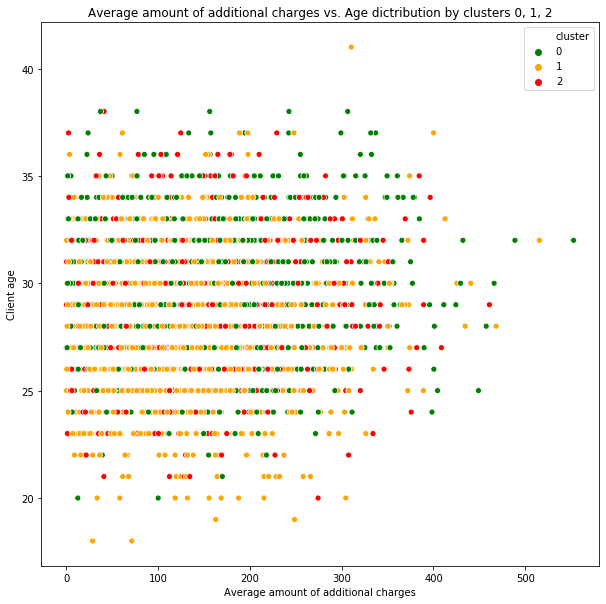

In [28]:
show_clusters_on_plot(gym_data.query('cluster in [0,1,2]'), 'Avg_additional_charges_total', 'Age', ['Green', 'Orange', 'Red'])
plt.xlabel('Average amount of additional charges')
plt.ylabel('Client age')
plt.title('Average amount of additional charges vs. Age dictribution by clusters 0, 1, 2')
plt.show()

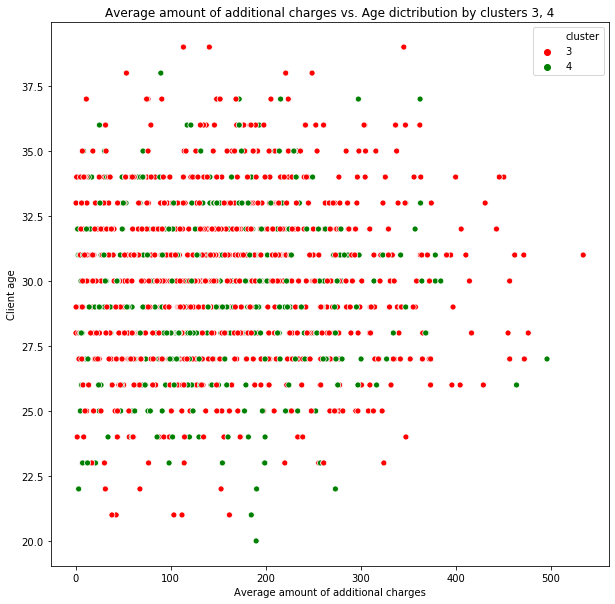

In [29]:
show_clusters_on_plot(gym_data.query('cluster in [3,4]'), 'Avg_additional_charges_total', 'Age', ['Red', 'Green'])
plt.xlabel('Average amount of additional charges')
plt.ylabel('Client age')
plt.title('Average amount of additional charges vs. Age dictribution by clusters 3, 4')
plt.show()

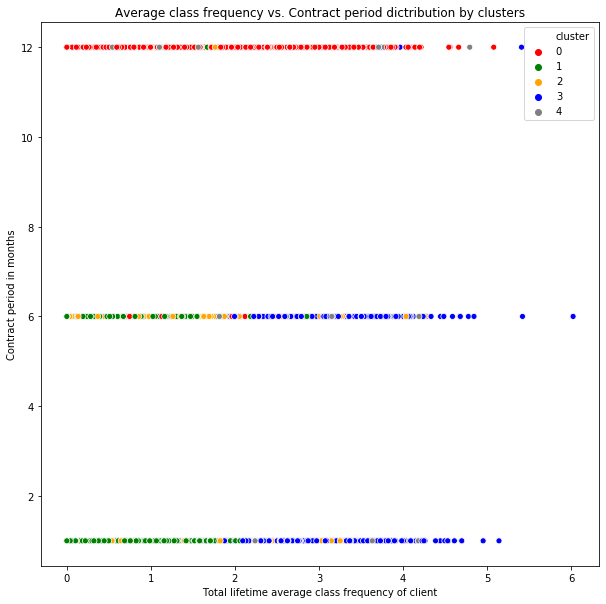

In [30]:
show_clusters_on_plot(gym_data, 'Avg_class_frequency_total', 'Contract_period', ['Red', 'Green', 'Orange', 'Blue', 'Grey'])
plt.xlabel('Total lifetime average class frequency of client')
plt.ylabel('Contract period in months')
plt.title('Average class frequency vs. Contract period dictribution by clusters')
plt.show()

<div class="alert alert-danger">
<b>Reviewer's comment:</b> Please, add your custom axes captions, pandas columns names are not very useful here.
</div>

The first two graphs of Avg_additional_charges vs Age show that all clusters intersect, ie clients of all ages spend money on additional stuff regardless of cluster. This is not true for the 3rd graph which shows that people who sign up for longer contract periods usually have more sessions per week compared to others.

In [31]:
churn_rate = gym_data.pivot_table(index='cluster', values='Churn', aggfunc=('count', 'sum')).reset_index(drop=False)

In [32]:
churn_rate['churn_rate'] = churn_rate['sum']/churn_rate['count']

print('Churn rate by clusters')
churn_rate.style.format({'churn_rate':"{:.2%}"})

Churn rate by clusters


,cluster,count,sum,churn_rate
0,0,867,19,2.19%
1,1,1227,703,57.29%
2,2,632,156,24.68%
3,3,888,80,9.01%
4,4,386,103,26.68%


The clusters definitely differ in terms of churn rate. The 1, 4, 2 clusters are at the highest risk of leaving the classes, whereas 0, 1 are ~98% and ~91% likely to stay, respectively.


<div class="alert alert-success">
<b>Reviewer's comment: </b> Good job! You have carefully studied the distribution of features for each of the clusters and have reached valuable conclusions!
</div>

### General Conclusion
Churn groups have similarities:Most users leave their phone numbers. People live near the gym and there are almost the same number of men and women. Clients who stay buy more additional stuff, usually have a longer contract period, prefer to attend the gym with partners 2 times a week on average. 60% of clients who stop attending classes are single, whereas only 45% of clients who stay indicated that they are single.

The clusters definitely differ in terms of churn rate. The 1, 4, 2 clusters are at the highest risk of leaving the classes, whereas 0, 1 are ~98% and ~91% likely to stay, respectively. The 0 cluster has the lowest churn rate, clients from this cluster are likely to attend the gym with their partners, they prefer group visits more than other and sign up for the longest contract period. All clusters have approximately the same mean age. The 1st and 4th clusters have the highest churn rate, clients from these groups are not likely to bring their partners, they spend less hours at gym per week and sign up for the shortest contract period. 

A portrait of a loyal customer - he/she has a partner and wants to attend the gym with a partner or train in groups, is around 30 years old, lives nearby, signs up for a long period, is interested in sport products and attends the gym consistently 3-4 times a week. Based on that marketers should focus their attention on creating a family friendly atmosphere, maybe offer a deal for people who have kids as the target audience is 28+ couples. 

As was said above an important observation from the analysis is that people who do not stop gym classes usually go there with partners or attend group sessions. On contrary, people who are most likely to discontinue the sessions do not attend group trainings and come alone. This may mean that other people (partners/personal trainers/groupmates) motivate a client to stay. So one recommendation for the gym is to offer loners to attend group trainings or come with a friend or a partner. 

<div class="alert alert-danger">
<s><b>Reviewer's comment:</b> Overall, a good finale, but the size of the reserach does not correspond to such a short conclusion. Don't forget that conclusions are the main product of an analyst, and they are used to judge his expertise. Please, update your conlusions.
</div>